<a href="https://colab.research.google.com/github/nitesis/CAS_AICP_M6_Exercises/blob/main/Session_1_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings

In this tutorial we will convert text into Word2Vec and Glove Vectors. At first, we will visualise some data. After that we will create a traditional classifier with Support Vector Machines.

### Libraries
[Gensim](https://radimrehurek.com/gensim/)
[Datasets](https://pypi.org/project/datasets/)
[NLTK]()

### Word Embeddings
1. [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) with Gensim
2. [GLoVE](https://www.google.com/url?q=https%3A%2F%2Fnlp.stanford.edu%2Fprojects%2Fglove%2F)

In [34]:
### Comparing BoW, N-grams, Word2Vec, and GloVe

# Install necessary libraries
!pip install nltk gensim
!pip install datasets

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.util import ngrams
from datasets import load_dataset, DatasetDict


In [36]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "The quick brown fox is quick and smart",
    "Dogs are loyal and smart animals"
]

In [11]:


# 1. Bag of Words (BoW)
print("=== Bag of Words ===")
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus).toarray()
print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n", bow_matrix)


=== Bag of Words ===
Vocabulary: ['and' 'animals' 'are' 'brown' 'dog' 'dogs' 'fox' 'is' 'jumps' 'lazy'
 'loyal' 'over' 'quick' 'smart' 'the']
BoW Matrix:
 [[0 0 0 1 1 0 1 0 1 1 0 1 1 0 2]
 [1 0 0 1 0 0 1 1 0 0 0 0 2 1 1]
 [1 1 1 0 0 1 0 0 0 0 1 0 0 1 0]]


In [12]:

# 2. N-grams
print("\n=== N-grams ===")
n = 2  # Change to 3 for trigrams, etc.
print("N-grams (bigrams):")
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence.lower())
    bigrams = list(ngrams(tokens, n))
    print(bigrams)



=== N-grams ===
N-grams (bigrams):
[('the', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog')]
[('the', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'is'), ('is', 'quick'), ('quick', 'and'), ('and', 'smart')]
[('dogs', 'are'), ('are', 'loyal'), ('loyal', 'and'), ('and', 'smart'), ('smart', 'animals')]


In [13]:
# 2. N-grams (continued)
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
print("\n=== N-grams ===")
vectorizer = CountVectorizer(ngram_range=(2, 3), analyzer = "word")  # Generates bigram and trigram words
ngram_word_matrix = vectorizer.fit_transform(corpus).toarray()
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Ngrams Matrix:\n", ngram_word_matrix)



=== N-grams ===
Vocabulary: ['and smart' 'and smart animals' 'are loyal' 'are loyal and' 'brown fox'
 'brown fox is' 'brown fox jumps' 'dogs are' 'dogs are loyal' 'fox is'
 'fox is quick' 'fox jumps' 'fox jumps over' 'is quick' 'is quick and'
 'jumps over' 'jumps over the' 'lazy dog' 'loyal and' 'loyal and smart'
 'over the' 'over the lazy' 'quick and' 'quick and smart' 'quick brown'
 'quick brown fox' 'smart animals' 'the lazy' 'the lazy dog' 'the quick'
 'the quick brown']
Ngrams Matrix:
 [[0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1]
 [1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]]


In [14]:
# 2. N-grams (continued)
print("\n=== N-grams ===")
vectorizer = CountVectorizer(ngram_range=(2, 3), analyzer= "char")  # Generates bigram and trigram characters
ngram_word_matrix = vectorizer.fit_transform(corpus).toarray()
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Ngrams Matrix:\n", ngram_word_matrix)



=== N-grams ===
Vocabulary: [' a' ' an' ' ar' ' b' ' br' ' d' ' do' ' f' ' fo' ' i' ' is' ' j' ' ju'
 ' l' ' la' ' lo' ' o' ' ov' ' q' ' qu' ' s' ' sm' ' t' ' th' 'al' 'al '
 'als' 'an' 'and' 'ani' 'ar' 'are' 'art' 'az' 'azy' 'br' 'bro' 'ck' 'ck '
 'd ' 'd s' 'do' 'dog' 'e ' 'e l' 'e q' 'er' 'er ' 'fo' 'fox' 'gs' 'gs '
 'he' 'he ' 'ic' 'ick' 'im' 'ima' 'is' 'is ' 'ju' 'jum' 'k ' 'k a' 'k b'
 'l ' 'l a' 'la' 'laz' 'lo' 'loy' 'ls' 'ma' 'mal' 'mar' 'mp' 'mps' 'n '
 'n f' 'nd' 'nd ' 'ni' 'nim' 'og' 'ogs' 'ov' 'ove' 'ow' 'own' 'ox' 'ox '
 'oy' 'oya' 'ps' 'ps ' 'qu' 'qui' 'r ' 'r t' 're' 're ' 'ro' 'row' 'rt'
 'rt ' 's ' 's a' 's o' 's q' 'sm' 'sma' 't ' 't a' 'th' 'the' 'ui' 'uic'
 'um' 'ump' 've' 'ver' 'wn' 'wn ' 'x ' 'x i' 'x j' 'y ' 'y d' 'ya' 'yal'
 'zy' 'zy ']
Ngrams Matrix:
 [[0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1
  1 1 1 0 0 1 1 2 1 1 1 1 1 1 0 0 2 2 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0
  0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 

In [15]:

# 3. Word2Vec
print("\n=== Word2Vec ===")
# Tokenize the corpus
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]



=== Word2Vec ===


In [16]:

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Display embeddings for a sample word
print("Vector for 'quick':\n", word2vec_model.wv['quick'])


Vector for 'quick':
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [17]:

# Reduce dimensions using PCA for visualization
words = list(word2vec_model.wv.index_to_key)
embeddings = np.array([word2vec_model.wv[word] for word in words])
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


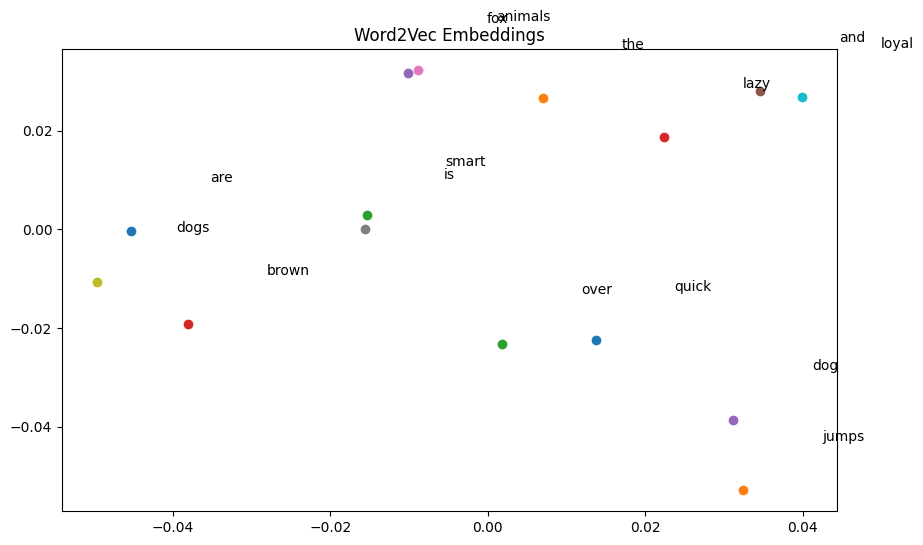

In [18]:

# Plot Word2Vec embeddings
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word)
plt.title("Word2Vec Embeddings")
plt.show()


# Download Word2Vec

In [37]:
from gensim.downloader import load

# Download a pre-trained Word2Vec model
word2vec_model = load('word2vec-google-news-300')

In [ ]:
print(word2vec_model['king'])

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [38]:
from scipy.spatial.distance import cosine

For similarity always add minus 1.


In [39]:
similarity_kq = 1 - cosine(word2vec_model['king'], word2vec_model['queen'])
similarity_kmq = 1 - cosine(word2vec_model['king']-word2vec_model['man']+ word2vec_model['woman'], word2vec_model['queen'])
print(f"Cosine Similarity between king and queen: {similarity_kq}")
print(f"Cosine Similarity between king-man+woman and queen: {similarity_kmq}")

Cosine Similarity between king and queen: 0.6510956618655842
Cosine Similarity between king-man+woman and queen: 0.7300518095482258


### Download GLoVE
Either manually download from here https://nlp.stanford.edu/projects/glove/
 and place it in the content folder.

 Or run the following code. (takes a few minutes to download and run)



In [40]:
import urllib.request
import zipfile
import os

# Download GloVe embeddings
url = "https://nlp.stanford.edu/data/glove.6B.zip"
output_path = "glove.6B.zip"

if not os.path.exists(output_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(url, output_path)

# Unzip the file
with zipfile.ZipFile(output_path, "r") as zip_ref:
    zip_ref.extractall("./glove/")
    print("GloVe embeddings extracted!")

GloVe embeddings extracted!


In [41]:
import numpy as np

# Path to GloVe file
glove_path = "./glove/glove.6B.50d.txt"

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]  # The word
            vector = np.asarray(values[1:], dtype='float32')  # The embedding vector
            embeddings[word] = vector
    return embeddings

# Load embeddings
glove_embeddings = load_glove_embeddings(glove_path)




In [42]:
embeddings = np.array([glove_embeddings[word] for word in words])
reduced_embeddings = pca.fit_transform(embeddings)

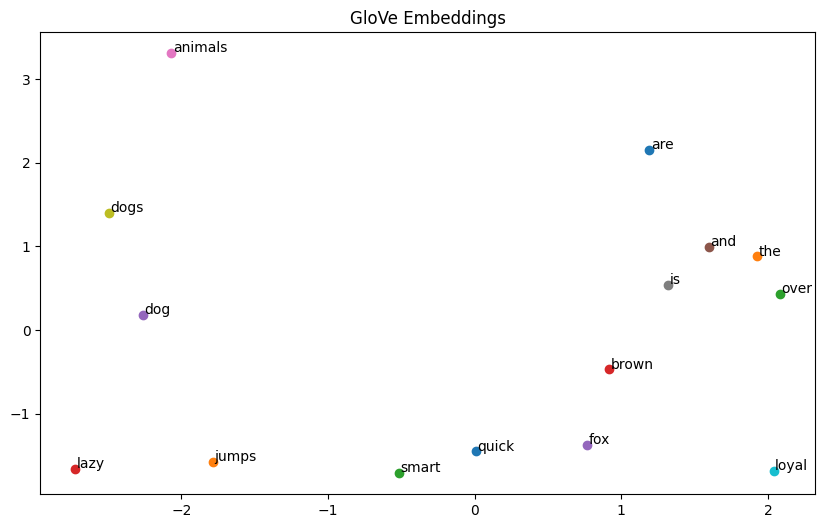

In [43]:

# Plot GloVe embeddings
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word)
plt.title("GloVe Embeddings")
plt.show()

# Classification with Word Embeddings

We will use an [IMDB dataset](https://huggingface.co/datasets/adrienheymans/imdb-movie-genres) to classify movie genres. We will use the "text" field as the input to predict the target "genre".

At first, we will embed the vectors using GLoVE and then we will use a Support Vector Machines ([SVM](https://scikit-learn.org/stable/modules/svm.html)) classifier as a model.

The main objective of SVM is to find the optimal hyperplane that separates the data points of different classes in the feature space. The hyperplane is chosen such that the margin between the closest points of different classes (support vectors) is maximized. More explanation on it [here](https://www.geeksforgeeks.org/support-vector-machine-algorithm/).

SVMs use kernels which are functions defining the similarity between two data points. Different kernels are used based on the nature of the data and its distribution. For example,

1. Linear Kernel is suitable for linearly separable data, where a straight-line hyperplane can divide the classes.
2. Radial Basis Function (rbf) projects data into a higher-dimensional space using the Gaussian similarity function and is more suitable for cases with non-linear data where classes cannot be separated by a straight line.

In [44]:
data = load_dataset("adrienheymans/imdb-movie-genres")

In [45]:
data

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'genre', 'label'],
        num_rows: 54214
    })
    test: Dataset({
        features: ['title', 'text', 'genre', 'label'],
        num_rows: 54200
    })
})

In [46]:
df_train = data["train"].to_pandas()
df_train.genre.value_counts()

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [47]:
small_data = DatasetDict() # we can run with a smaller dataset if we want however note that the class distribution may be skewed.
small_data["train"] = data["train"].select(range(1000))  # Select the first 1000 rows
small_data["test"] = data["test"].select(range(200))    # Select the first 200 rows
print(small_data)

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'genre', 'label'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['title', 'text', 'genre', 'label'],
        num_rows: 200
    })
})


In [48]:
small_data["train"][0:2]["text"]

['listening in to a conversation between his doctor and parents, 10-year-old oscar learns what nobody has the courage to tell him. he only has a few weeks to live. furious, he refuses to speak to anyone except straight-talking rose, the lady in pink he meets on the hospital stairs. as christmas approaches, rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow oscar to live life and love to the full, in the company of his friends pop corn, einstein, bacon and childhood sweetheart peggy blue.',
 'a brother and sister with a past incestuous relationship have a current murderous relationship. he murders the women who reject him and she murders the women who get too close to him.']

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import re
from nltk.tokenize import word_tokenize

In [50]:

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)
    return tokens

# Create feature vectors
def text_to_glove_vector(text, embeddings, embedding_dim=100):
    tokens = preprocess_text(text)
    vectors = [embeddings[word] for word in tokens if word in embeddings]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    # Mean wird genutzt um den Durchschnitt der Tokkens zu nehmen. Dies ist eine Möglichkeit, unterschiedliche Tokens mit ungleicher Anzahler Sequenzen anzugleichen.
    return np.mean(vectors, axis=0)

In [51]:
# Prepare training data (takes a few minutes to run)
embedding_dim = 100
X_train = np.array([text_to_glove_vector(text, glove_embeddings, embedding_dim) for text in data["train"]["text"]])
y_train = np.array(data["train"]["genre"])

X_test = np.array([text_to_glove_vector(text, glove_embeddings, embedding_dim) for text in data["test"]["text"]])
y_test = np.array(data["test"]["genre"])


In [52]:

# Train SVM classifier (takes a few minutes to run)
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [53]:
# Evaluate the model (takes a few minutes to run)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.34      0.23      0.27      1314
       adult       0.36      0.09      0.14       590
   adventure       0.23      0.03      0.05       775
   animation       0.26      0.01      0.02       498
   biography       0.00      0.00      0.00       264
      comedy       0.42      0.46      0.44      7446
       crime       0.00      0.00      0.00       505
 documentary       0.58      0.80      0.68     13096
       drama       0.48      0.73      0.58     13612
      family       0.00      0.00      0.00       783
     fantasy       0.50      0.00      0.01       322
   game-show       0.70      0.51      0.59       193
     history       0.00      0.00      0.00       243
      horror       0.45      0.35      0.40      2204
       music       0.60      0.45      0.52       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       318
        news       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# To Do

Now create a similar classifier using Word2Vec embeddings that were previously created.

In [54]:
# Convert text to average Word2Vec features
def text_to_word2vec_vector(text, model, vector_size=50):
    tokens = preprocess_text(text)
    #vectors = # Fill this line to read in the vectors
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)  # Handle empty vectors
    return np.mean(vectors, axis=0)

# Prepare features and labels
def prepare_features_and_labels(data, model, vector_size=50):
    X, y = [], []
    for text, label in zip(data["text"], data["genre"]):
        vector = text_to_word2vec_vector(text, model, vector_size)
        X.append(vector)
        y.append(label)
    return np.array(X), np.array(y)


In [55]:
# Prepare training data (takes a few minutes to run)

X_train_wv, y_train_wv = prepare_features_and_labels(data["train"], word2vec_model, vector_size=50)
X_test_wv, y_test_wv = prepare_features_and_labels(data["test"], word2vec_model, vector_size=50)


In [56]:

# Train SVM classifier (takes several minutes to run)
svm_wv = SVC(kernel="linear", C=1.0, random_state=42)
svm_wv.fit(X_train_wv, y_train_wv)



SVC(kernel='linear', random_state=42)

In [57]:
# Evaluate the model
y_pred_wv = svm_wv.predict(X_test_wv)
print(classification_report(y_test_wv, y_pred_wv))

              precision    recall  f1-score   support

      action       0.45      0.29      0.35      1314
       adult       0.50      0.27      0.35       590
   adventure       0.42      0.11      0.18       775
   animation       0.40      0.06      0.11       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.59      0.56      7446
       crime       0.36      0.01      0.02       505
 documentary       0.65      0.85      0.74     13096
       drama       0.52      0.78      0.63     13612
      family       0.53      0.07      0.12       783
     fantasy       0.83      0.02      0.03       322
   game-show       0.82      0.55      0.66       193
     history       0.00      0.00      0.00       243
      horror       0.59      0.56      0.57      2204
       music       0.64      0.49      0.56       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       318
        news       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Finding optimal parameters for SVC

Scikit Learn offers an automated way for optimizing the hyperparameters of a model.

### Hyperparameters
1. **C (Regularization Parameter)** controls the trade-off between achieving a low error on the training data and maintaining a smooth decision boundary (generalization).
  1. A small C Penalizes misclassification less but allows a smoother decision boundary (can lead to underfitting).
  2. A large C focuses on minimizing training error and can lead to a more complex decision boundary (overfitting).
2. **Gamma** (only for RBF)
Determines how far the influence of a single training example reaches.
  1. Small 𝛾 Points far apart are treated as similar.
Results in a smoother decision boundary.
Can lead to underfitting.
  2. Large 𝛾 Each point influences only nearby points.
Results in tighter decision boundaries.
Can lead to overfitting.


### Cross-validation (CV)

Cross-validation is used in machine learning to evaluate the performance of a model. It involves dividing the dataset into multiple subsets (or "folds") to assess how well the model generalizes to unseen data. Cross-validation helps ensure that the model's performance is not overly optimistic or biased due to the specific train-test split used. In cross-validation, the dataset is repeatedly split into training and testing subsets.
The model is trained on the training subset and evaluated on the testing subset.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
]

In [ ]:
X_train[0:2000].shape

(2000, 50)

In [ ]:
# Define the SVM model
svc = SVC()

# Define the parameter grid


# Create GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, scoring='accuracy') # cross validation can be 4 only as the least populated class in y has only 4 members

# Perform grid search
grid_search.fit(X_train[0:2000], y_train[0:2000])

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Cross-Validation Score: 0.48200000000000004


In [ ]:
# Retrieve the best model
best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model on the full dataset
y_pred = best_model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      action       0.30      0.22      0.25      1314
       adult       0.22      0.15      0.18       590
   adventure       0.19      0.06      0.09       775
   animation       0.14      0.03      0.04       498
   biography       0.05      0.01      0.02       264
      comedy       0.41      0.42      0.41      7446
       crime       0.07      0.01      0.01       505
 documentary       0.59      0.75      0.66     13096
       drama       0.46      0.71      0.56     13612
      family       0.27      0.04      0.07       783
     fantasy       0.04      0.00      0.01       322
   game-show       0.55      0.44      0.49       193
     history       0.00      0.00      0.00       243
      horror       0.42      0.26      0.32      2204
       music       0.48      0.39      0.43       731
     musical       0.03      0.00      0.01       276
     mystery       0.00      0.00      0.00       318
        news       0.09    